We make predictions for classification.

# Imports

In [1]:
import pandas as pd
from pickle import load

# Load data and models

In [2]:
from src.utils import get_data

X_train, X_test, y_train, y_test = get_data(classification=True)

In [3]:
with open("../results/classification/svm.pkl", "rb") as f:
    svm = load(f)

In [28]:
# Scores

from sklearn.metrics import accuracy_score, f1_score
from src.utils import l2_loss

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

scores = pd.DataFrame(columns=['Accuracy', 'f1 macro', 'l2 score'], index=['Training set', 'Test set'])
measures = [accuracy_score, lambda y_true, y_pred : f1_score(y_true, y_pred, average='macro'), l2_loss]

for col, measure in zip (scores.columns, measures):
    scores[col] = [measure(y_train, y_train_pred), measure(y_test, y_test_pred)]

In [29]:
scores

,Accuracy,f1 macro,l2 score
Training set,0.485904,0.426413,1.203918
Test set,0.432836,0.405560,1.132953


In [30]:
scores.to_csv('../results/classification/scores.csv')

In [ ]:
X_pred = pd.DataFrame(
    {
        "Quiz": [18, 8, 19, 17, 12],
        "HW": [19, 11, 20, 6, 19],
        "Participation": [5, 5, 3, 0, 5],
        "Midterm": [95, 60, 50, 85, 65],
    }
)

predictions = svm.predict(X_pred)
results = X_pred.copy()
results["Predicted letter grade"] = predictions

In [6]:
results

,Quiz,HW,Participation,Midterm,Predicted letter grade
0,18,19,5,95,A
1,8,11,5,60,D
2,19,20,3,50,C
3,17,6,0,85,B-
4,12,19,5,65,C+


In [21]:
results.to_csv('../results/classification/prediction.csv')

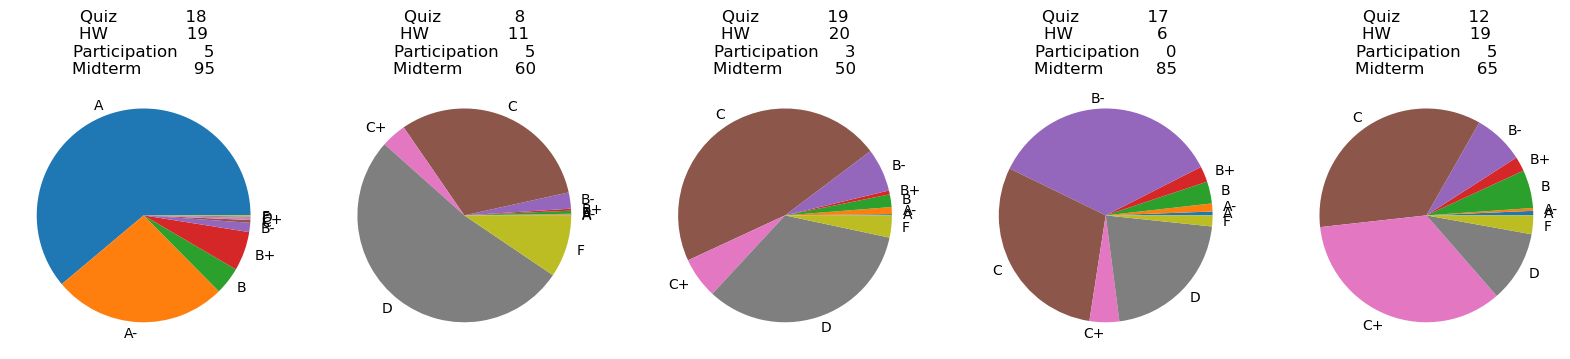

In [19]:
import matplotlib.pyplot as plt


pred_proba = svm.predict_proba(X_pred)
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
for i, ax in enumerate(axs.flatten()):
    ax.pie(pred_proba[i], labels=svm.classes_)
    ax.set_title(results.iloc[i, :4].to_string())